/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 6s 53ms/step - loss: 927.7670 - mae: 19.0690 - val_loss: 153.5686 - val_mae: 9.9279
Epoch 2/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 110.2846 - mae: 7.9917 - val_loss: 28.7792 - val_mae: 4.6161
Epoch 3/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 22.7897 - mae: 3.9300 - val_loss: 4.1696 - val_mae: 1.7504
Epoch 4/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.8772 - mae: 1.2027 - val_loss: 1.3409 - val_mae: 0.8295
Epoch 5/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.2743 - mae: 0.7149 - val_loss: 1.7344 - val_mae: 0.8405
Epoch 6/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.1340 - mae: 0.8830 - val_loss: 3.1636 - val_mae: 1.1984
Epoch 7/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.4569 - mae: 0.7609 - val_loss: 1.1726 - val_mae: 0.6257
Epoch 8/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.0937 - mae: 0.6395 - val_loss: 0.6363 - val_mae: 0.4760
Epoch 9/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.61

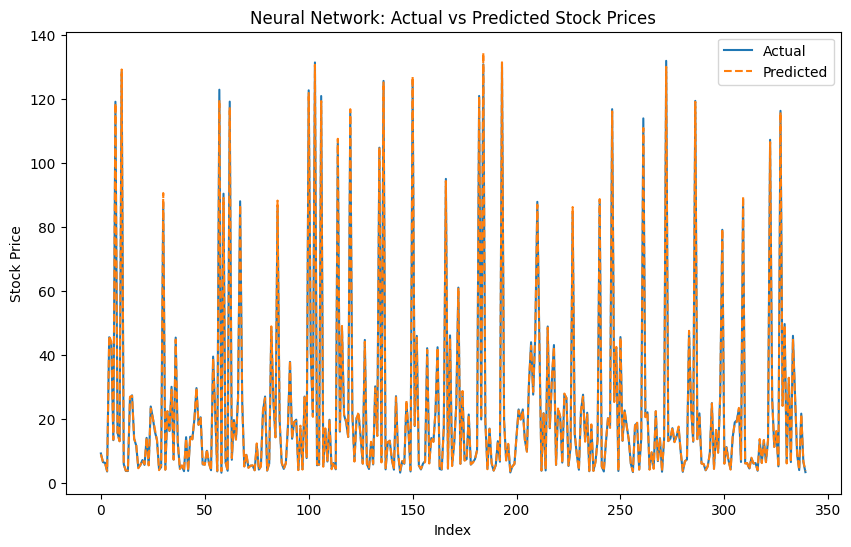

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import tensorflow as tf
from tensorflow.keras import layers, models

# Load and preprocess the data
def load_data(file_path):
    df = pd.read_csv(file_path)
    # Ensure data contains necessary columns
    required_columns = ['Open', 'High', 'Low', 'Close', 'Volume']
    if not all(col in df.columns for col in required_columns):
        raise ValueError(f"The dataset must contain the following columns: {', '.join(required_columns)}")
    df.dropna(subset=['Close'], inplace=True)
    df['Close'] = pd.to_numeric(df['Close'], errors='coerce')
    df.dropna(subset=['Close'], inplace=True)
    return df

# Feature engineering for prediction tasks (e.g., predicting price movement)
def prepare_data(df):
    df['Price Change'] = df['Close'].pct_change()
    df.dropna(inplace=True)
    X = df[['Open', 'High', 'Low', 'Volume']]
    y = df['Close']
    return X, y

# Build the Neural Network Model with 10 layers and 128 neurons per layer
def build_nn_model(input_shape):
    model = models.Sequential()
    model.add(layers.Dense(128, input_dim=input_shape, activation='relu'))  # First layer with input
    for _ in range(9):  # Adding 9 more layers with 128 neurons each
        model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dense(1))  # Output layer for regression (single output)

    model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])
    return model

# Real-time prediction function for DeFi data
def real_time_prediction(file_path):
    # Load and preprocess data
    df = load_data(file_path)
    
    # Feature engineering and data preparation
    X, y = prepare_data(df)
    
    # Split data (80% training, 20% testing)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Normalize features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Build and train the Neural Network model
    nn_model = build_nn_model(X_train_scaled.shape[1])
    nn_model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

    # Predict with the trained model
    y_pred = nn_model.predict(X_test_scaled)

    # Calculate Mean Squared Error (MSE) and RMSE
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    print(f'Neural Network - MSE: {mse:.4f}, RMSE: {rmse:.4f}')

    # Plot Actual vs Predicted values
    plt.figure(figsize=(10, 6))
    plt.plot(y_test.values, label='Actual')
    plt.plot(y_pred, label='Predicted', linestyle='--')
    plt.legend()
    plt.title('Neural Network: Actual vs Predicted Stock Prices')
    plt.xlabel('Index')
    plt.ylabel('Stock Price')
    plt.show()

# Example of real-time prediction
file_path = '/kaggle/input/nvidia-stock-data/NVIDIA_STOCK.csv'  # Update with your CSV file path
real_time_prediction(file_path)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Training Random Forest...
Training SVM...
Training Neural Network...
Epoch 1/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 5s 52ms/step - loss: 1193.0800 - mae: 21.9862 - val_loss: 107.3054 - val_mae: 7.6255
Epoch 2/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 69.1520 - mae: 6.4421 - val_loss: 36.4736 - val_mae: 4.5803
Epoch 3/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 34.9682 - mae: 4.5934 - val_loss: 16.5115 - val_mae: 3.2061
Epoch 4/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 11.3800 - mae: 2.5677 - val_loss: 4.5747 - val_mae: 1.7044
Epoch 5/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 5.0934 - mae: 1.5881 - val_loss: 3.3662 - val_mae: 1.2856
Epoch 6/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.1484 - mae: 0.9920 - val_loss: 2.0122 - val_mae: 0.9471
Epoch 7/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.1600 - mae: 0.6843 - val_loss: 1.5049 - val_mae: 0.7012
Epoch 8/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.4483 - mae: 0.7244 - val_loss: 2.6980 - val_mae

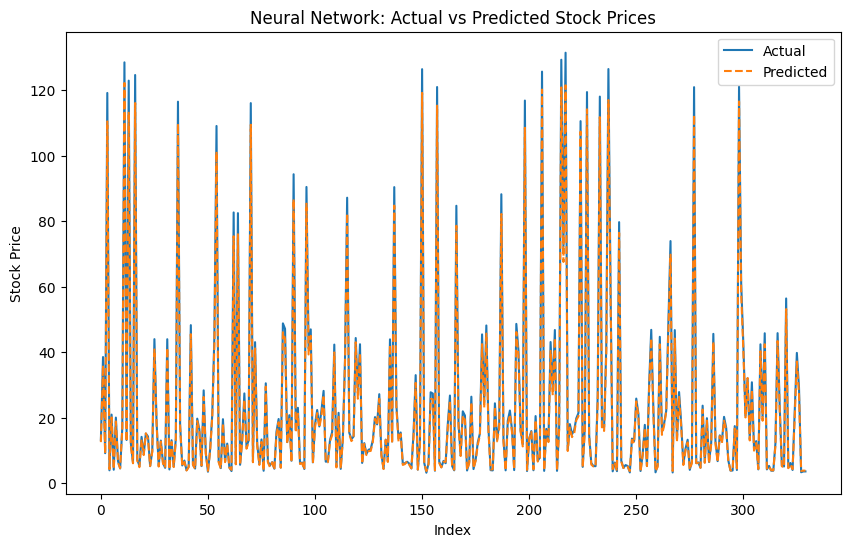

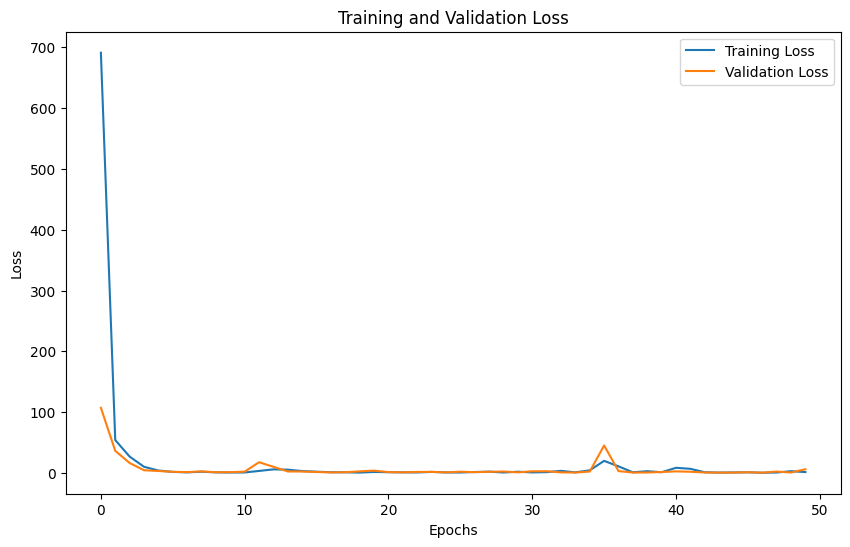

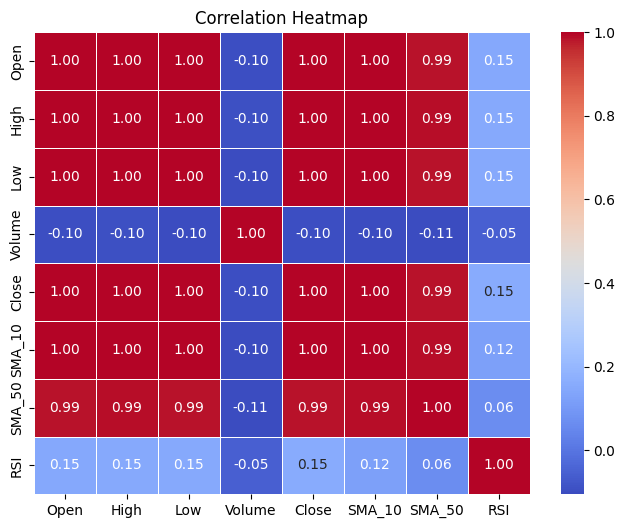

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split

# Load and preprocess the data
def load_data(file_path):
    df = pd.read_csv(file_path)
    # Ensure data contains necessary columns
    required_columns = ['Open', 'High', 'Low', 'Close', 'Volume']
    if not all(col in df.columns for col in required_columns):
        raise ValueError(f"The dataset must contain the following columns: {', '.join(required_columns)}")
    df.dropna(subset=['Close'], inplace=True)
    df['Close'] = pd.to_numeric(df['Close'], errors='coerce')
    df.dropna(subset=['Close'], inplace=True)
    return df

# Feature Engineering for stock market prediction
def feature_engineering(df):
    # Adding moving averages and technical indicators
    df['SMA_10'] = df['Close'].rolling(window=10).mean()  # 10-day moving average
    df['SMA_50'] = df['Close'].rolling(window=50).mean()  # 50-day moving average
    df['RSI'] = 100 - (100 / (1 + df['Close'].pct_change().rolling(window=14).mean()))  # Relative Strength Index (RSI)
    df.dropna(inplace=True)
    
    # Features and target
    X = df[['Open', 'High', 'Low', 'Volume', 'SMA_10', 'SMA_50', 'RSI']]
    y = df['Close']
    return X, y

# Build the Neural Network Model
def build_nn_model(input_shape):
    model = models.Sequential()
    model.add(layers.Dense(128, input_dim=input_shape, activation='relu'))  # First layer with input
    for _ in range(9):  # Adding 9 more layers with 128 neurons each
        model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dense(1))  # Output layer for regression (single output)

    model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])
    return model

# Train and evaluate different models
def train_models(X_train_scaled, y_train, X_test_scaled, y_test):
    models_dict = {
        'Random Forest': RandomForestRegressor(),
        'SVM': SVR(),
        'Neural Network': build_nn_model(X_train_scaled.shape[1])
    }

    results = {}
    for name, model in models_dict.items():
        print(f'Training {name}...')
        if name == 'Neural Network':
            history = model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)
            y_pred = model.predict(X_test_scaled)
        else:
            model.fit(X_train_scaled, y_train)
            y_pred = model.predict(X_test_scaled)
        
        mse = mean_squared_error(y_test, y_pred)
        rmse = np.sqrt(mse)
        mae = mean_absolute_error(y_test, y_pred)
        results[name] = {
            'MSE': mse,
            'RMSE': rmse,
            'MAE': mae,
            'Predicted': y_pred  # Store predictions for plotting later
        }

    return results, history

# Plot trends (training progress over epochs)
def plot_trends(history):
    # Plot training & validation loss values
    plt.figure(figsize=(10, 6))
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

# Plot correlations between features and target variable
def plot_correlations(df):
    # Plot heatmap to show correlations
    correlation_matrix = df[['Open', 'High', 'Low', 'Volume', 'Close', 'SMA_10', 'SMA_50', 'RSI']].corr()
    plt.figure(figsize=(8, 6))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
    plt.title('Correlation Heatmap')
    plt.show()

# Cross-validation
def cross_validation(X, y, model, n_splits=5):
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)
    mse_scores = []
    for train_index, test_index in kf.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        
        X_train_scaled = StandardScaler().fit_transform(X_train)
        X_test_scaled = StandardScaler().transform(X_test)
        
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
        
        mse = mean_squared_error(y_test, y_pred)
        mse_scores.append(mse)
    
    return np.mean(mse_scores)

# Real-time prediction function for stock market prediction
def real_time_prediction(file_path):
    # Load and preprocess data
    df = load_data(file_path)
    
    # Feature engineering and data preparation
    X, y = feature_engineering(df)
    
    # Split data (80% training, 20% testing)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Normalize features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Train and evaluate models
    results, history = train_models(X_train_scaled, y_train, X_test_scaled, y_test)

    # Print performance of each model
    for model_name, result in results.items():
        print(f'{model_name} - MSE: {result["MSE"]:.4f}, RMSE: {result["RMSE"]:.4f}, MAE: {result["MAE"]:.4f}')

    # Plot Actual vs Predicted values for Neural Network model
    plt.figure(figsize=(10, 6))
    plt.plot(y_test.values, label='Actual')
    plt.plot(results['Neural Network']['Predicted'], label='Predicted', linestyle='--')
    plt.legend()
    plt.title('Neural Network: Actual vs Predicted Stock Prices')
    plt.xlabel('Index')
    plt.ylabel('Stock Price')
    plt.show()

    # Plot trends (training progress over epochs)
    plot_trends(history)

    # Plot correlations between features and target variable
    plot_correlations(df)

# Example of real-time prediction
file_path = '/kaggle/input/nvidia-stock-data/NVIDIA_STOCK.csv'  # Update with your CSV file path
real_time_prediction(file_path)


Columns in the dataset: Index(['Price', 'Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume'], dtype='object')


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


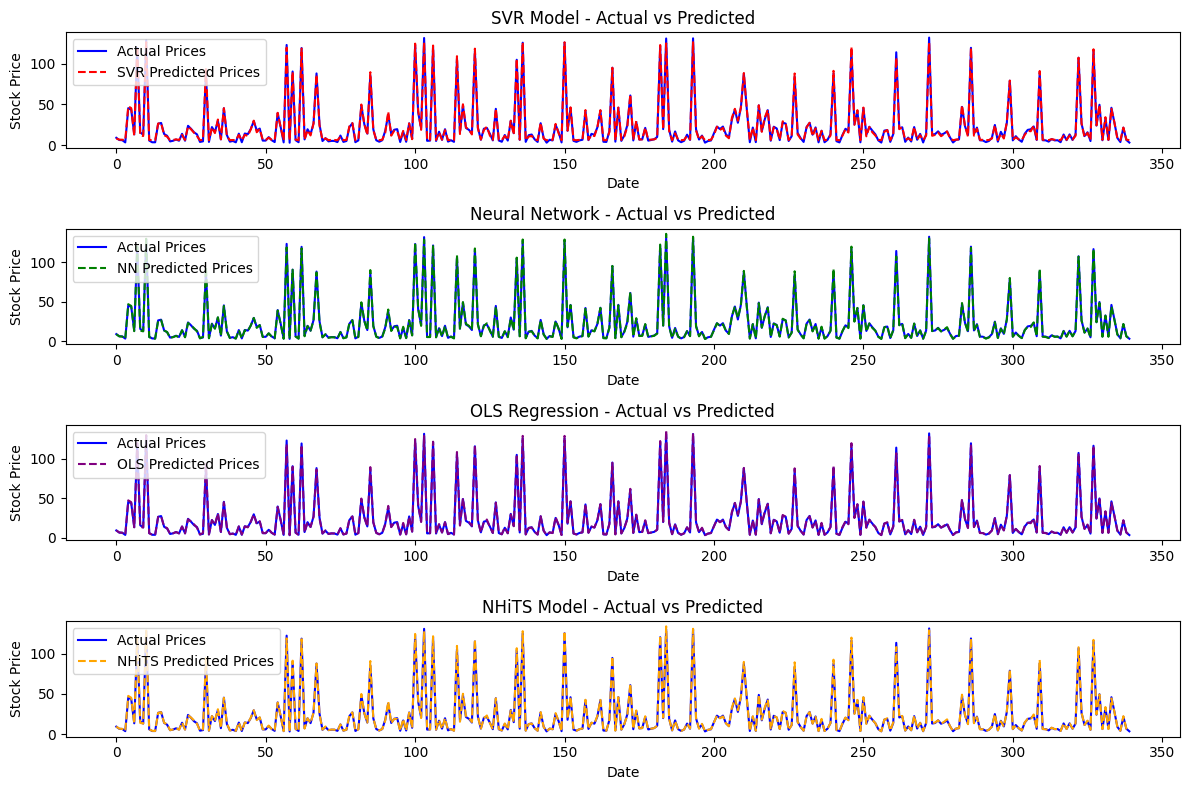

SVR MSE: 2.7838945731037783
NN MSE: 1.0023803866908896
OLS MSE: 0.9301093949301306
NHiTS MSE: 1.194943715898172


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
import tensorflow as tf
from tensorflow.keras import layers, models
import statsmodels.api as sm

# Load and preprocess the data
def load_and_preprocess_data(file_path):
    # Load the data
    data = pd.read_csv(file_path)

    # Print column names to identify the issue
    print("Columns in the dataset:", data.columns)

    # Check for a 'Close' or equivalent column
    if 'Close' not in data.columns and 'Adj Close' not in data.columns:
        raise ValueError("The dataset does not contain a valid closing price column.")
    
    # If the 'Close' column exists, use it; otherwise, use 'Adj Close'
    if 'Close' in data.columns:
        closing_price_column = 'Close'
    else:
        closing_price_column = 'Adj Close'

    # Feature engineering (using previous day's close price for prediction)
    data['Prev_Close'] = data[closing_price_column].shift(1)
    data.dropna(inplace=True)  # Drop NaN values generated by the shift

    # Ensure we only use numeric data for scaling
    data = data[['Prev_Close', closing_price_column]]  # Use the correct column for closing price

    # Scaling features
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(data)

    X = scaled_data[:, 0].reshape(-1, 1)  # Using 'Prev_Close' as feature
    y = scaled_data[:, 1]  # The closing price as target

    return X, y, scaler, data

# Support Vector Regression (SVR) Model
def svr_model(X_train, X_test, y_train, y_test, scaler):
    svr_regressor = SVR(kernel='rbf')
    svr_regressor.fit(X_train, y_train)
    
    # Predicting
    y_pred = svr_regressor.predict(X_test)
    
    # Rescale the predictions and actual values back to original scale
    y_test_rescaled = scaler.inverse_transform(np.concatenate([X_test, y_test.reshape(-1, 1)], axis=1))[:, 1]
    y_pred_rescaled = scaler.inverse_transform(np.concatenate([X_test, y_pred.reshape(-1, 1)], axis=1))[:, 1]

    return y_test_rescaled, y_pred_rescaled

# Neural Network Model (Optimized)
def nn_model(X_train, X_test, y_train, y_test, scaler):
    model = models.Sequential()
    model.add(layers.Dense(250, input_dim=1, activation='relu'))  # 250 neurons in the first layer
    model.add(layers.Dense(250, activation='relu'))  # 250 neurons in the second layer
    model.add(layers.Dense(250, activation='relu'))  # 250 neurons in the third layer
    model.add(layers.Dense(1))  # Output layer

    model.compile(optimizer='adam', loss='mean_squared_error')

    # Train the model (150 epochs)
    model.fit(X_train, y_train, epochs=150, batch_size=32, verbose=0)

    # Predicting
    y_pred = model.predict(X_test)

    # Rescale the predictions and actual values back to original scale
    y_test_rescaled = scaler.inverse_transform(np.concatenate([X_test, y_test.reshape(-1, 1)], axis=1))[:, 1]
    y_pred_rescaled = scaler.inverse_transform(np.concatenate([X_test, y_pred.reshape(-1, 1)], axis=1))[:, 1]

    return y_test_rescaled, y_pred_rescaled

# Statsmodels for OLS Regression
def ols_regression(X_train, X_test, y_train, y_test, scaler):
    X_train = sm.add_constant(X_train)  # Add intercept
    X_test = sm.add_constant(X_test)  # Add intercept
    
    model = sm.OLS(y_train, X_train)
    results = model.fit()

    # Predicting
    y_pred = results.predict(X_test)

    # Rescale the predictions and actual values back to original scale
    y_test_rescaled = scaler.inverse_transform(np.concatenate([X_test[:, 1:].reshape(-1, 1), y_test.reshape(-1, 1)], axis=1))[:, 1]
    y_pred_rescaled = scaler.inverse_transform(np.concatenate([X_test[:, 1:].reshape(-1, 1), y_pred.reshape(-1, 1)], axis=1))[:, 1]

    return y_test_rescaled, y_pred_rescaled

# NHiTSModel Model (Basic Time Series Model)
def nhits_model(X_train, X_test, y_train, y_test, scaler):
    # Define the model architecture (simplified version for this example)
    model = models.Sequential()
    model.add(layers.LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1)))  # LSTM layer
    model.add(layers.LSTM(50))  # Second LSTM layer
    model.add(layers.Dense(1))  # Output layer

    model.compile(optimizer='adam', loss='mean_squared_error')

    # Train the model (150 epochs)
    model.fit(X_train, y_train, epochs=150, batch_size=32, verbose=0)

    # Predicting
    y_pred = model.predict(X_test)

    # Rescale the predictions and actual values back to original scale
    y_test_rescaled = scaler.inverse_transform(np.concatenate([X_test, y_test.reshape(-1, 1)], axis=1))[:, 1]
    y_pred_rescaled = scaler.inverse_transform(np.concatenate([X_test, y_pred.reshape(-1, 1)], axis=1))[:, 1]

    return y_test_rescaled, y_pred_rescaled

# Train a model and predict
def real_time_prediction(file_path):
    # Load and preprocess the data
    X, y, scaler, data = load_and_preprocess_data(file_path)

    # Split the data into train and test sets (80% train, 20% test)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # SVR Model
    svr_y_test, svr_y_pred = svr_model(X_train, X_test, y_train, y_test, scaler)

    # Neural Network Model
    nn_y_test, nn_y_pred = nn_model(X_train, X_test, y_train, y_test, scaler)

    # OLS Regression Model (Statsmodels)
    ols_y_test, ols_y_pred = ols_regression(X_train, X_test, y_train, y_test, scaler)

    # NHiTS Model
    nhits_y_test, nhits_y_pred = nhits_model(X_train, X_test, y_train, y_test, scaler)

    # Plot the results
    plt.figure(figsize=(12, 8))

    # Plot for SVR
    plt.subplot(4, 1, 1)
    plt.plot(svr_y_test, label="Actual Prices", color='blue')
    plt.plot(svr_y_pred, label="SVR Predicted Prices", color='red', linestyle='--')
    plt.title('SVR Model - Actual vs Predicted')
    plt.xlabel('Date')
    plt.ylabel('Stock Price')
    plt.legend()

    # Plot for Neural Network
    plt.subplot(4, 1, 2)
    plt.plot(nn_y_test, label="Actual Prices", color='blue')
    plt.plot(nn_y_pred, label="NN Predicted Prices", color='green', linestyle='--')
    plt.title('Neural Network - Actual vs Predicted')
    plt.xlabel('Date')
    plt.ylabel('Stock Price')
    plt.legend()

    # Plot for OLS Regression
    plt.subplot(4, 1, 3)
    plt.plot(ols_y_test, label="Actual Prices", color='blue')
    plt.plot(ols_y_pred, label="OLS Predicted Prices", color='purple', linestyle='--')
    plt.title('OLS Regression - Actual vs Predicted')
    plt.xlabel('Date')
    plt.ylabel('Stock Price')
    plt.legend()

    # Plot for NHiTS Model
    plt.subplot(4, 1, 4)
    plt.plot(nhits_y_test, label="Actual Prices", color='blue')
    plt.plot(nhits_y_pred, label="NHiTS Predicted Prices", color='orange', linestyle='--')
    plt.title('NHiTS Model - Actual vs Predicted')
    plt.xlabel('Date')
    plt.ylabel('Stock Price')
    plt.legend()

    plt.tight_layout()
    plt.show()

    # Print some metrics for comparison
    print(f"SVR MSE: {mean_squared_error(svr_y_test, svr_y_pred)}")
    print(f"NN MSE: {mean_squared_error(nn_y_test, nn_y_pred)}")
    print(f"OLS MSE: {mean_squared_error(ols_y_test, ols_y_pred)}")
    print(f"NHiTS MSE: {mean_squared_error(nhits_y_test, nhits_y_pred)}")

# Example usage
file_path = '/kaggle/input/nvidia-stock-data/NVIDIA_STOCK.csv'  # Update with your CSV file path
real_time_prediction(file_path)


GPU is available
Error while setting memory growth: Physical devices cannot be modified after being initialized
Columns in the dataset: Index(['Price', 'Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume'], dtype='object')


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


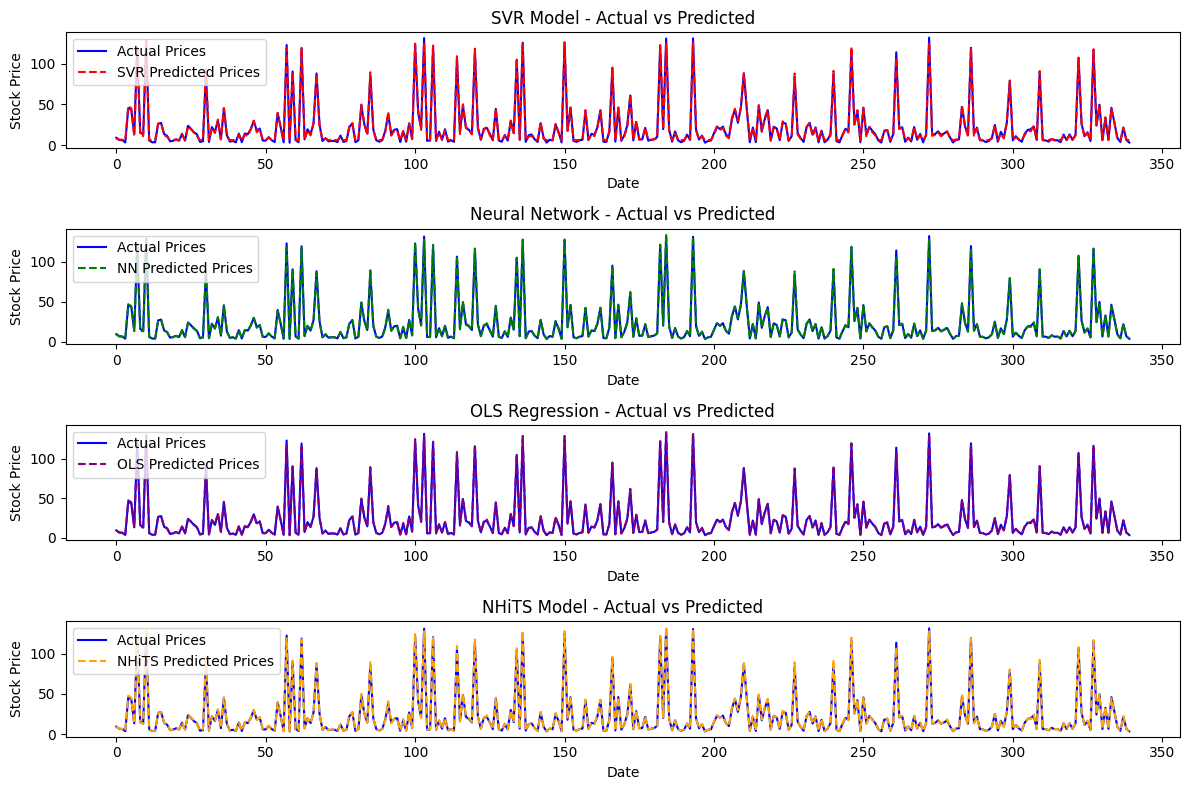

SVR MSE: 2.7838945731037783
NN MSE: 0.9201621747927758
OLS MSE: 0.9301093949301306
NHiTS MSE: 1.1883183805059732


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
import tensorflow as tf
from tensorflow.keras import layers, models
import statsmodels.api as sm

# Ensure TensorFlow uses GPU memory growth settings if GPU is available
physical_devices = tf.config.list_physical_devices('GPU')
if physical_devices:
    print("GPU is available")
    # Set memory growth to avoid allocating all GPU memory
    try:
        for device in physical_devices:
            tf.config.experimental.set_memory_growth(device, True)
    except RuntimeError as e:
        print(f"Error while setting memory growth: {e}")
else:
    print("GPU is not available, using CPU")

# Load and preprocess the data
def load_and_preprocess_data(file_path):
    # Load the data
    data = pd.read_csv(file_path)

    # Print column names to identify the issue
    print("Columns in the dataset:", data.columns)

    # Check for a 'Close' or equivalent column
    if 'Close' not in data.columns and 'Adj Close' not in data.columns:
        raise ValueError("The dataset does not contain a valid closing price column.")
    
    # If the 'Close' column exists, use it; otherwise, use 'Adj Close'
    if 'Close' in data.columns:
        closing_price_column = 'Close'
    else:
        closing_price_column = 'Adj Close'

    # Feature engineering (using previous day's close price for prediction)
    data['Prev_Close'] = data[closing_price_column].shift(1)
    data.dropna(inplace=True)  # Drop NaN values generated by the shift

    # Ensure we only use numeric data for scaling
    data = data[['Prev_Close', closing_price_column]]  # Use the correct column for closing price

    # Scaling features
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(data)

    X = scaled_data[:, 0].reshape(-1, 1)  # Using 'Prev_Close' as feature
    y = scaled_data[:, 1]  # The closing price as target

    return X, y, scaler, data

# SVR Model
def svr_model(X_train, X_test, y_train, y_test, scaler):
    svr_regressor = SVR(kernel='rbf')
    svr_regressor.fit(X_train, y_train)
    
    # Predicting
    y_pred = svr_regressor.predict(X_test)
    
    # Rescale the predictions and actual values back to original scale
    y_test_rescaled = scaler.inverse_transform(np.concatenate([X_test, y_test.reshape(-1, 1)], axis=1))[:, 1]
    y_pred_rescaled = scaler.inverse_transform(np.concatenate([X_test, y_pred.reshape(-1, 1)], axis=1))[:, 1]

    return y_test_rescaled, y_pred_rescaled

# Neural Network Model (Optimized)
def nn_model(X_train, X_test, y_train, y_test, scaler):
    model = models.Sequential()
    model.add(layers.Dense(250, input_dim=1, activation='relu'))  # 250 neurons in the first layer
    model.add(layers.Dense(250, activation='relu'))  # 250 neurons in the second layer
    model.add(layers.Dense(250, activation='relu'))  # 250 neurons in the third layer
    model.add(layers.Dense(1))  # Output layer

    model.compile(optimizer='adam', loss='mean_squared_error')

    # Train the model (150 epochs)
    model.fit(X_train, y_train, epochs=150, batch_size=32, verbose=0)

    # Predicting
    y_pred = model.predict(X_test)

    # Rescale the predictions and actual values back to original scale
    y_test_rescaled = scaler.inverse_transform(np.concatenate([X_test, y_test.reshape(-1, 1)], axis=1))[:, 1]
    y_pred_rescaled = scaler.inverse_transform(np.concatenate([X_test, y_pred.reshape(-1, 1)], axis=1))[:, 1]

    return y_test_rescaled, y_pred_rescaled

# Statsmodels for OLS Regression
def ols_regression(X_train, X_test, y_train, y_test, scaler):
    X_train = sm.add_constant(X_train)  # Add intercept
    X_test = sm.add_constant(X_test)  # Add intercept
    
    model = sm.OLS(y_train, X_train)
    results = model.fit()

    # Predicting
    y_pred = results.predict(X_test)

    # Rescale the predictions and actual values back to original scale
    y_test_rescaled = scaler.inverse_transform(np.concatenate([X_test[:, 1:].reshape(-1, 1), y_test.reshape(-1, 1)], axis=1))[:, 1]
    y_pred_rescaled = scaler.inverse_transform(np.concatenate([X_test[:, 1:].reshape(-1, 1), y_pred.reshape(-1, 1)], axis=1))[:, 1]

    return y_test_rescaled, y_pred_rescaled

# NHiTSModel Model (Basic Time Series Model)
def nhits_model(X_train, X_test, y_train, y_test, scaler):
    # Define the model architecture (simplified version for this example)
    model = models.Sequential()
    model.add(layers.LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1)))  # LSTM layer
    model.add(layers.LSTM(50))  # Second LSTM layer
    model.add(layers.Dense(1))  # Output layer

    model.compile(optimizer='adam', loss='mean_squared_error')

    # Train the model (150 epochs)
    model.fit(X_train, y_train, epochs=150, batch_size=32, verbose=0)

    # Predicting
    y_pred = model.predict(X_test)

    # Rescale the predictions and actual values back to original scale
    y_test_rescaled = scaler.inverse_transform(np.concatenate([X_test, y_test.reshape(-1, 1)], axis=1))[:, 1]
    y_pred_rescaled = scaler.inverse_transform(np.concatenate([X_test, y_pred.reshape(-1, 1)], axis=1))[:, 1]

    return y_test_rescaled, y_pred_rescaled

# Real-time Prediction with Model and Plotting
def real_time_prediction(file_path):
    # Load and preprocess the data
    X, y, scaler, data = load_and_preprocess_data(file_path)

    # Split the data into train and test sets (80% train, 20% test)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # SVR Model
    svr_y_test, svr_y_pred = svr_model(X_train, X_test, y_train, y_test, scaler)

    # Neural Network Model
    nn_y_test, nn_y_pred = nn_model(X_train, X_test, y_train, y_test, scaler)

    # OLS Regression Model (Statsmodels)
    ols_y_test, ols_y_pred = ols_regression(X_train, X_test, y_train, y_test, scaler)

    # NHiTS Model
    nhits_y_test, nhits_y_pred = nhits_model(X_train, X_test, y_train, y_test, scaler)

    # Plot the results
    plt.figure(figsize=(12, 8))

    # Plot for SVR
    plt.subplot(4, 1, 1)
    plt.plot(svr_y_test, label="Actual Prices", color='blue')
    plt.plot(svr_y_pred, label="SVR Predicted Prices", color='red', linestyle='--')
    plt.title('SVR Model - Actual vs Predicted')
    plt.xlabel('Date')
    plt.ylabel('Stock Price')
    plt.legend()

    # Plot for Neural Network
    plt.subplot(4, 1, 2)
    plt.plot(nn_y_test, label="Actual Prices", color='blue')
    plt.plot(nn_y_pred, label="NN Predicted Prices", color='green', linestyle='--')
    plt.title('Neural Network - Actual vs Predicted')
    plt.xlabel('Date')
    plt.ylabel('Stock Price')
    plt.legend()

    # Plot for OLS Regression
    plt.subplot(4, 1, 3)
    plt.plot(ols_y_test, label="Actual Prices", color='blue')
    plt.plot(ols_y_pred, label="OLS Predicted Prices", color='purple', linestyle='--')
    plt.title('OLS Regression - Actual vs Predicted')
    plt.xlabel('Date')
    plt.ylabel('Stock Price')
    plt.legend()

    # Plot for NHiTS Model
    plt.subplot(4, 1, 4)
    plt.plot(nhits_y_test, label="Actual Prices", color='blue')
    plt.plot(nhits_y_pred, label="NHiTS Predicted Prices", color='orange', linestyle='--')
    plt.title('NHiTS Model - Actual vs Predicted')
    plt.xlabel('Date')
    plt.ylabel('Stock Price')
    plt.legend()

    plt.tight_layout()
    plt.show()

    # Print some metrics for comparison
    print(f"SVR MSE: {mean_squared_error(svr_y_test, svr_y_pred)}")
    print(f"NN MSE: {mean_squared_error(nn_y_test, nn_y_pred)}")
    print(f"OLS MSE: {mean_squared_error(ols_y_test, ols_y_pred)}")
    print(f"NHiTS MSE: {mean_squared_error(nhits_y_test, nhits_y_pred)}")

# Example usage
file_path = '/kaggle/input/nvidia-stock-data/NVIDIA_STOCK.csv'  # Update with your CSV file path
real_time_prediction(file_path)


GPU is available
Error while setting memory growth: Physical devices cannot be modified after being initialized
Columns in the dataset: Index(['Price', 'Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume'], dtype='object')


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


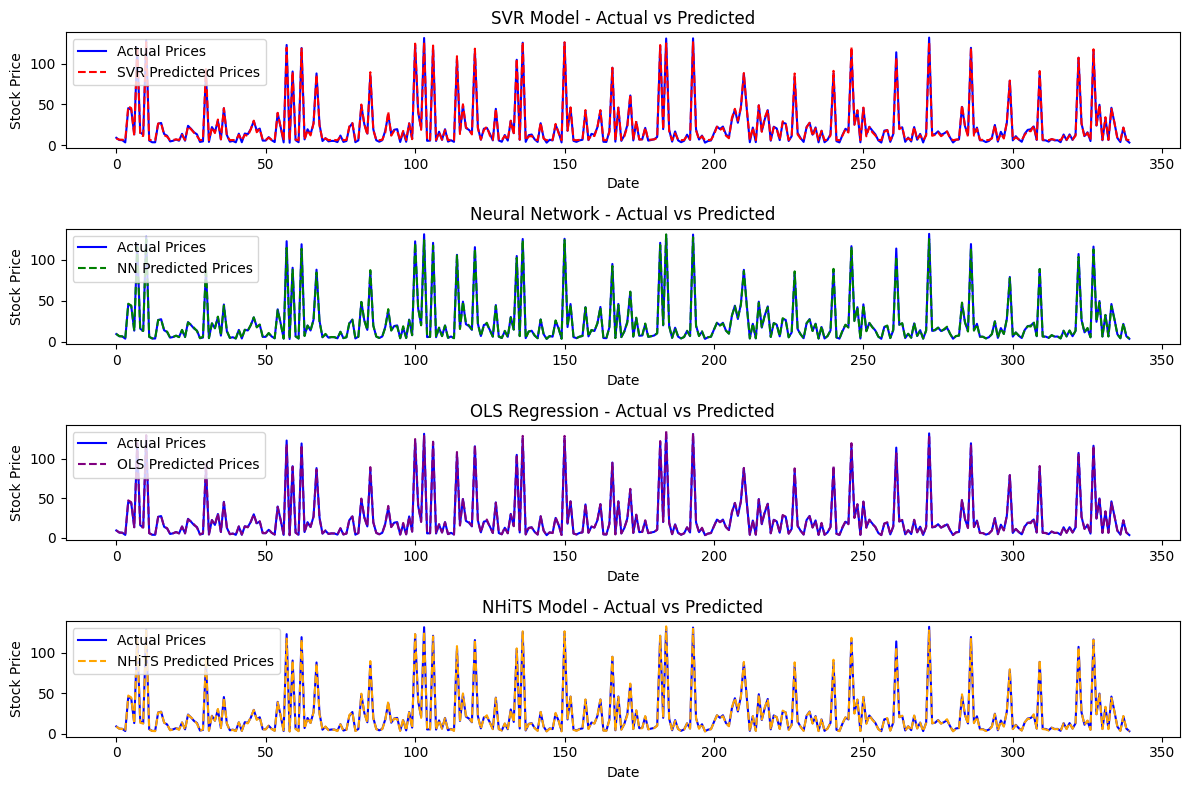

SVR MSE: 2.7838945731037783
NN MSE: 1.6009259920177696
OLS MSE: 0.9301093949301306
NHiTS MSE: 1.0084567604606012


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
import tensorflow as tf
from tensorflow.keras import layers, models
import statsmodels.api as sm

# Ensure TensorFlow uses GPU memory growth settings if GPU is available
physical_devices = tf.config.list_physical_devices('GPU')
if physical_devices:
    print("GPU is available")
    # Set memory growth to avoid allocating all GPU memory
    try:
        for device in physical_devices:
            tf.config.experimental.set_memory_growth(device, True)
    except RuntimeError as e:
        print(f"Error while setting memory growth: {e}")
else:
    print("GPU is not available, using CPU")

# Load and preprocess the data
def load_and_preprocess_data(file_path):
    # Load the data
    data = pd.read_csv(file_path)

    # Print column names to identify the issue
    print("Columns in the dataset:", data.columns)

    # Check for a 'Close' or equivalent column
    if 'Close' not in data.columns and 'Adj Close' not in data.columns:
        raise ValueError("The dataset does not contain a valid closing price column.")
    
    # If the 'Close' column exists, use it; otherwise, use 'Adj Close'
    if 'Close' in data.columns:
        closing_price_column = 'Close'
    else:
        closing_price_column = 'Adj Close'

    # Feature engineering (using previous day's close price for prediction)
    data['Prev_Close'] = data[closing_price_column].shift(1)
    data.dropna(inplace=True)  # Drop NaN values generated by the shift

    # Ensure we only use numeric data for scaling
    data = data[['Prev_Close', closing_price_column]]  # Use the correct column for closing price

    # Scaling features
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(data)

    X = scaled_data[:, 0].reshape(-1, 1)  # Using 'Prev_Close' as feature
    y = scaled_data[:, 1]  # The closing price as target

    return X, y, scaler, data

# SVR Model
def svr_model(X_train, X_test, y_train, y_test, scaler):
    svr_regressor = SVR(kernel='rbf')
    svr_regressor.fit(X_train, y_train)
    
    # Predicting
    y_pred = svr_regressor.predict(X_test)
    
    # Rescale the predictions and actual values back to original scale
    y_test_rescaled = scaler.inverse_transform(np.concatenate([X_test, y_test.reshape(-1, 1)], axis=1))[:, 1]
    y_pred_rescaled = scaler.inverse_transform(np.concatenate([X_test, y_pred.reshape(-1, 1)], axis=1))[:, 1]

    return y_test_rescaled, y_pred_rescaled

# Neural Network Model (Optimized)
def nn_model(X_train, X_test, y_train, y_test, scaler):
    model = models.Sequential()
    model.add(layers.Dense(250, input_dim=1, activation='relu'))  # 250 neurons in the first layer
    model.add(layers.Dense(250, activation='relu'))  # 250 neurons in the second layer
    model.add(layers.Dense(250, activation='relu'))  # 250 neurons in the third layer
    model.add(layers.Dense(1))  # Output layer

    model.compile(optimizer='adam', loss='mean_squared_error')

    # Train the model (150 epochs)
    model.fit(X_train, y_train, epochs=150, batch_size=32, verbose=0)

    # Predicting
    y_pred = model.predict(X_test)

    # Rescale the predictions and actual values back to original scale
    y_test_rescaled = scaler.inverse_transform(np.concatenate([X_test, y_test.reshape(-1, 1)], axis=1))[:, 1]
    y_pred_rescaled = scaler.inverse_transform(np.concatenate([X_test, y_pred.reshape(-1, 1)], axis=1))[:, 1]

    return y_test_rescaled, y_pred_rescaled

# Statsmodels for OLS Regression
def ols_regression(X_train, X_test, y_train, y_test, scaler):
    X_train = sm.add_constant(X_train)  # Add intercept
    X_test = sm.add_constant(X_test)  # Add intercept
    
    model = sm.OLS(y_train, X_train)
    results = model.fit()

    # Predicting
    y_pred = results.predict(X_test)

    # Rescale the predictions and actual values back to original scale
    y_test_rescaled = scaler.inverse_transform(np.concatenate([X_test[:, 1:].reshape(-1, 1), y_test.reshape(-1, 1)], axis=1))[:, 1]
    y_pred_rescaled = scaler.inverse_transform(np.concatenate([X_test[:, 1:].reshape(-1, 1), y_pred.reshape(-1, 1)], axis=1))[:, 1]

    return y_test_rescaled, y_pred_rescaled

# NHiTSModel Model (Basic Time Series Model)
def nhits_model(X_train, X_test, y_train, y_test, scaler):
    # Define the model architecture (simplified version for this example)
    model = models.Sequential()
    model.add(layers.LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1)))  # LSTM layer
    model.add(layers.LSTM(50))  # Second LSTM layer
    model.add(layers.Dense(1))  # Output layer

    model.compile(optimizer='adam', loss='mean_squared_error')

    # Train the model (150 epochs)
    model.fit(X_train, y_train, epochs=150, batch_size=32, verbose=0)

    # Predicting
    y_pred = model.predict(X_test)

    # Rescale the predictions and actual values back to original scale
    y_test_rescaled = scaler.inverse_transform(np.concatenate([X_test, y_test.reshape(-1, 1)], axis=1))[:, 1]
    y_pred_rescaled = scaler.inverse_transform(np.concatenate([X_test, y_pred.reshape(-1, 1)], axis=1))[:, 1]

    return y_test_rescaled, y_pred_rescaled

# Real-time Prediction with Model and Plotting
def real_time_prediction(file_path):
    # Load and preprocess the data
    X, y, scaler, data = load_and_preprocess_data(file_path)

    # Split the data into train and test sets (80% train, 20% test)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # SVR Model
    svr_y_test, svr_y_pred = svr_model(X_train, X_test, y_train, y_test, scaler)

    # Neural Network Model
    nn_y_test, nn_y_pred = nn_model(X_train, X_test, y_train, y_test, scaler)

    # OLS Regression Model (Statsmodels)
    ols_y_test, ols_y_pred = ols_regression(X_train, X_test, y_train, y_test, scaler)

    # NHiTS Model
    nhits_y_test, nhits_y_pred = nhits_model(X_train, X_test, y_train, y_test, scaler)

    # Plot the results
    plt.figure(figsize=(12, 8))

    # Plot for SVR
    plt.subplot(4, 1, 1)
    plt.plot(svr_y_test, label="Actual Prices", color='blue')
    plt.plot(svr_y_pred, label="SVR Predicted Prices", color='red', linestyle='--')
    plt.title('SVR Model - Actual vs Predicted')
    plt.xlabel('Date')
    plt.ylabel('Stock Price')
    plt.legend()

    # Plot for Neural Network
    plt.subplot(4, 1, 2)
    plt.plot(nn_y_test, label="Actual Prices", color='blue')
    plt.plot(nn_y_pred, label="NN Predicted Prices", color='green', linestyle='--')
    plt.title('Neural Network - Actual vs Predicted')
    plt.xlabel('Date')
    plt.ylabel('Stock Price')
    plt.legend()

    # Plot for OLS Regression
    plt.subplot(4, 1, 3)
    plt.plot(ols_y_test, label="Actual Prices", color='blue')
    plt.plot(ols_y_pred, label="OLS Predicted Prices", color='purple', linestyle='--')
    plt.title('OLS Regression - Actual vs Predicted')
    plt.xlabel('Date')
    plt.ylabel('Stock Price')
    plt.legend()

    # Plot for NHiTS Model
    plt.subplot(4, 1, 4)
    plt.plot(nhits_y_test, label="Actual Prices", color='blue')
    plt.plot(nhits_y_pred, label="NHiTS Predicted Prices", color='orange', linestyle='--')
    plt.title('NHiTS Model - Actual vs Predicted')
    plt.xlabel('Date')
    plt.ylabel('Stock Price')
    plt.legend()

    plt.tight_layout()
    plt.show()

    # Print some metrics for comparison
    print(f"SVR MSE: {mean_squared_error(svr_y_test, svr_y_pred)}")
    print(f"NN MSE: {mean_squared_error(nn_y_test, nn_y_pred)}")
    print(f"OLS MSE: {mean_squared_error(ols_y_test, ols_y_pred)}")
    print(f"NHiTS MSE: {mean_squared_error(nhits_y_test, nhits_y_pred)}")

# Example usage
file_path = '/kaggle/input/nvidia-stock-data/NVIDIA_STOCK.csv'  # Update with your CSV file path
real_time_prediction(file_path)


GPU is available
Error while setting memory growth: Physical devices cannot be modified after being initialized
Columns in the dataset: Index(['Price', 'Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume'], dtype='object')


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


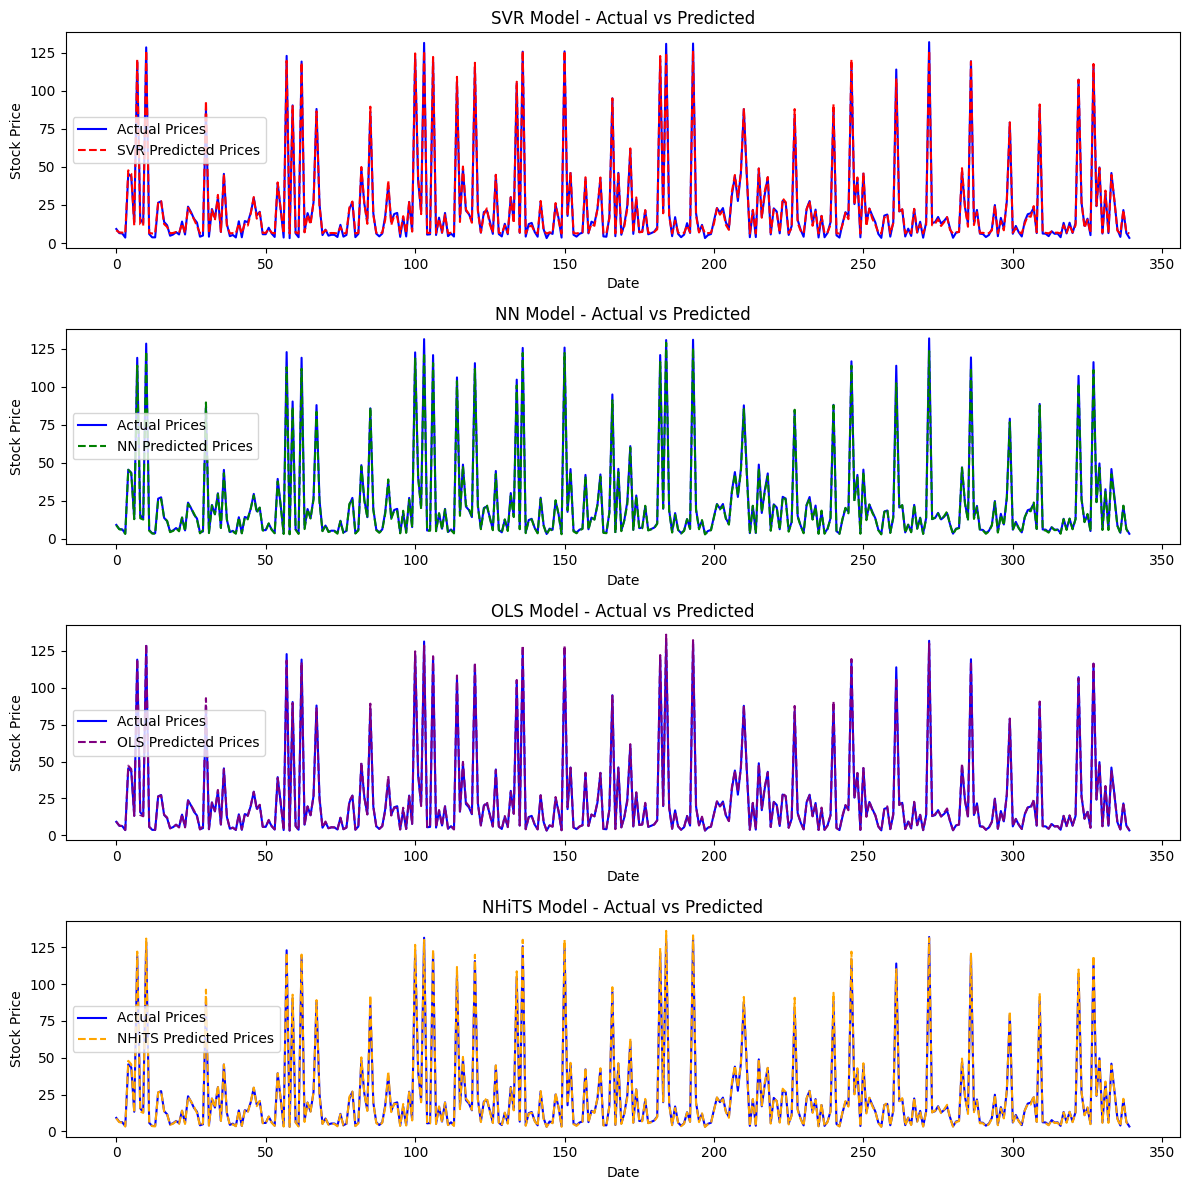

SVR MSE: 2.7838945731037783
NN MSE: 2.8556931042347466
OLS MSE: 0.9301093949301306
NHiTS MSE: 1.8502954910870817


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
import tensorflow as tf
from tensorflow.keras import layers, models
import statsmodels.api as sm

# Ensure TensorFlow uses GPU memory growth settings if GPU is available
physical_devices = tf.config.list_physical_devices('GPU')
if physical_devices:
    print("GPU is available")
    # Set memory growth to avoid allocating all GPU memory
    try:
        for device in physical_devices:
            tf.config.experimental.set_memory_growth(device, True)
    except RuntimeError as e:
        print(f"Error while setting memory growth: {e}")
else:
    print("GPU is not available, using CPU")

# Load and preprocess the data
def load_and_preprocess_data(file_path):
    # Load the data
    data = pd.read_csv(file_path)

    # Print column names to identify the issue
    print("Columns in the dataset:", data.columns)

    # Check for a 'Close' or equivalent column
    if 'Close' not in data.columns and 'Adj Close' not in data.columns:
        raise ValueError("The dataset does not contain a valid closing price column.")
    
    # If the 'Close' column exists, use it; otherwise, use 'Adj Close'
    closing_price_column = 'Close' if 'Close' in data.columns else 'Adj Close'

    # Feature engineering (using previous day's close price for prediction)
    data['Prev_Close'] = data[closing_price_column].shift(1)
    data.dropna(inplace=True)  # Drop NaN values generated by the shift

    # Ensure we only use numeric data for scaling
    data = data[['Prev_Close', closing_price_column]]  # Use the correct column for closing price

    # Scaling features
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(data)

    X = scaled_data[:, 0].reshape(-1, 1)  # Using 'Prev_Close' as feature
    y = scaled_data[:, 1]  # The closing price as target

    return X, y, scaler, data

# SVR Model
def svr_model(X_train, X_test, y_train, y_test, scaler):
    svr_regressor = SVR(kernel='rbf')
    svr_regressor.fit(X_train, y_train)
    
    # Predicting
    y_pred = svr_regressor.predict(X_test)
    
    # Rescale the predictions and actual values back to original scale
    y_test_rescaled = scaler.inverse_transform(np.concatenate([X_test, y_test.reshape(-1, 1)], axis=1))[:, 1]
    y_pred_rescaled = scaler.inverse_transform(np.concatenate([X_test, y_pred.reshape(-1, 1)], axis=1))[:, 1]

    return y_test_rescaled, y_pred_rescaled

# Neural Network Model (Optimized)
def nn_model(X_train, X_test, y_train, y_test, scaler):
    model = models.Sequential([
        layers.Dense(250, input_dim=1, activation='relu'),
        layers.Dense(250, activation='relu'),
        layers.Dense(250, activation='relu'),
        layers.Dense(1)  # Output layer
    ])
    
    model.compile(optimizer='adam', loss='mean_squared_error')

    # Train the model (150 epochs)
    model.fit(X_train, y_train, epochs=150, batch_size=32, verbose=0)

    # Predicting
    y_pred = model.predict(X_test)

    # Rescale the predictions and actual values back to original scale
    y_test_rescaled = scaler.inverse_transform(np.concatenate([X_test, y_test.reshape(-1, 1)], axis=1))[:, 1]
    y_pred_rescaled = scaler.inverse_transform(np.concatenate([X_test, y_pred.reshape(-1, 1)], axis=1))[:, 1]

    return y_test_rescaled, y_pred_rescaled

# Statsmodels for OLS Regression
def ols_regression(X_train, X_test, y_train, y_test, scaler):
    X_train = sm.add_constant(X_train)  # Add intercept
    X_test = sm.add_constant(X_test)  # Add intercept
    
    model = sm.OLS(y_train, X_train)
    results = model.fit()

    # Predicting
    y_pred = results.predict(X_test)

    # Rescale the predictions and actual values back to original scale
    y_test_rescaled = scaler.inverse_transform(np.concatenate([X_test[:, 1:].reshape(-1, 1), y_test.reshape(-1, 1)], axis=1))[:, 1]
    y_pred_rescaled = scaler.inverse_transform(np.concatenate([X_test[:, 1:].reshape(-1, 1), y_pred.reshape(-1, 1)], axis=1))[:, 1]

    return y_test_rescaled, y_pred_rescaled

# NHiTSModel Model (Basic Time Series Model)
def nhits_model(X_train, X_test, y_train, y_test, scaler):
    model = models.Sequential([
        layers.LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1)),  # LSTM layer
        layers.LSTM(50),  # Second LSTM layer
        layers.Dense(1)  # Output layer
    ])
    
    model.compile(optimizer='adam', loss='mean_squared_error')

    # Train the model (150 epochs)
    model.fit(X_train, y_train, epochs=150, batch_size=32, verbose=0)

    # Predicting
    y_pred = model.predict(X_test)

    # Rescale the predictions and actual values back to original scale
    y_test_rescaled = scaler.inverse_transform(np.concatenate([X_test, y_test.reshape(-1, 1)], axis=1))[:, 1]
    y_pred_rescaled = scaler.inverse_transform(np.concatenate([X_test, y_pred.reshape(-1, 1)], axis=1))[:, 1]

    return y_test_rescaled, y_pred_rescaled

# Real-time Prediction with Model and Plotting
def real_time_prediction(file_path):
    # Load and preprocess the data
    X, y, scaler, data = load_and_preprocess_data(file_path)

    # Split the data into train and test sets (80% train, 20% test)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Model predictions
    models = {
        'SVR': svr_model,
        'NN': nn_model,
        'OLS': ols_regression,
        'NHiTS': nhits_model
    }

    predictions = {}
    
    # Run predictions for all models
    for model_name, model_func in models.items():
        predictions[model_name] = model_func(X_train, X_test, y_train, y_test, scaler)

    # Plot the results
    fig, axes = plt.subplots(4, 1, figsize=(12, 12))

    colors = {
        'SVR': 'red',
        'NN': 'green',
        'OLS': 'purple',
        'NHiTS': 'orange'
    }

    for i, (model_name, (y_test_rescaled, y_pred_rescaled)) in enumerate(predictions.items()):
        ax = axes[i]
        ax.plot(y_test_rescaled, label="Actual Prices", color='blue')
        ax.plot(y_pred_rescaled, label=f"{model_name} Predicted Prices", color=colors[model_name], linestyle='--')
        ax.set_title(f'{model_name} Model - Actual vs Predicted')
        ax.set_xlabel('Date')
        ax.set_ylabel('Stock Price')
        ax.legend()

    plt.tight_layout()
    plt.show()

    # Print some metrics for comparison
    for model_name, (y_test_rescaled, y_pred_rescaled) in predictions.items():
        print(f"{model_name} MSE: {mean_squared_error(y_test_rescaled, y_pred_rescaled)}")

# Example usage
file_path = '/kaggle/input/nvidia-stock-data/NVIDIA_STOCK.csv'  # Update with your CSV file path
real_time_prediction(file_path)


GPU is available
Error while setting memory growth: Physical devices cannot be modified after being initialized
Columns in the dataset: Index(['Price', 'Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume'], dtype='object')


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step


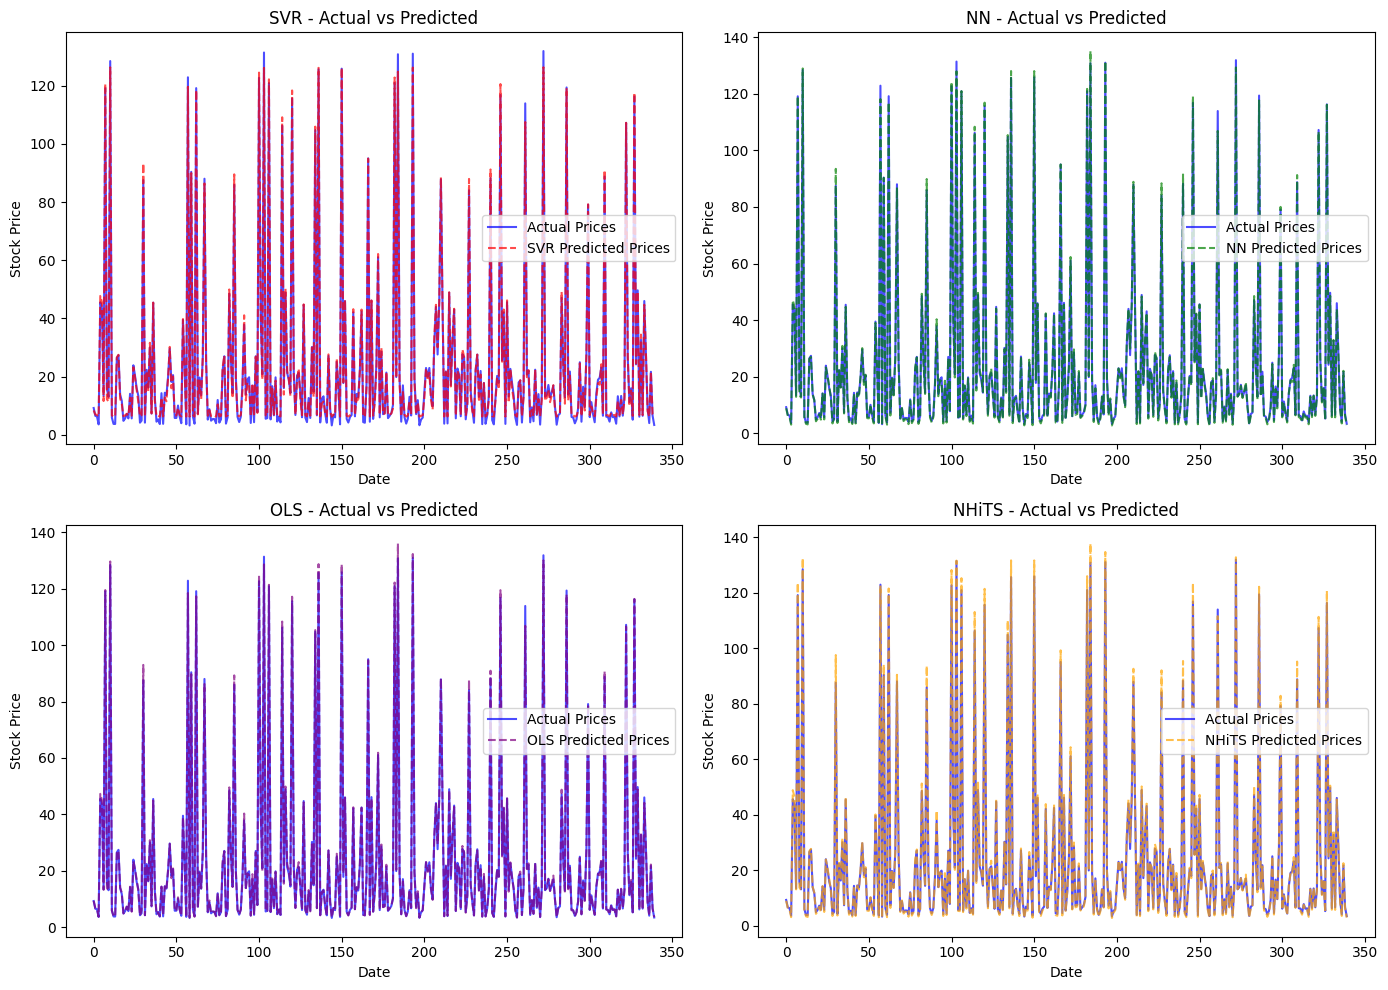

SVR MSE: 2.7838945731037783
NN MSE: 1.0960297373512013
OLS MSE: 0.9301093949301306
NHiTS MSE: 3.1216409982350997


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
import tensorflow as tf
from tensorflow.keras import layers, models
import statsmodels.api as sm

# Ensure TensorFlow uses GPU memory growth settings if GPU is available
physical_devices = tf.config.list_physical_devices('GPU')
if physical_devices:
    print("GPU is available")
    # Set memory growth to avoid allocating all GPU memory
    try:
        for device in physical_devices:
            tf.config.experimental.set_memory_growth(device, True)
    except RuntimeError as e:
        print(f"Error while setting memory growth: {e}")
else:
    print("GPU is not available, using CPU")

# Load and preprocess the data
def load_and_preprocess_data(file_path):
    # Load the data
    data = pd.read_csv(file_path)

    # Print column names to identify the issue
    print("Columns in the dataset:", data.columns)

    # Check for a 'Close' or equivalent column
    if 'Close' not in data.columns and 'Adj Close' not in data.columns:
        raise ValueError("The dataset does not contain a valid closing price column.")
    
    # If the 'Close' column exists, use it; otherwise, use 'Adj Close'
    if 'Close' in data.columns:
        closing_price_column = 'Close'
    else:
        closing_price_column = 'Adj Close'

    # Feature engineering (using previous day's close price for prediction)
    data['Prev_Close'] = data[closing_price_column].shift(1)
    data.dropna(inplace=True)  # Drop NaN values generated by the shift

    # Ensure we only use numeric data for scaling
    data = data[['Prev_Close', closing_price_column]]  # Use the correct column for closing price

    # Scaling features
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(data)

    X = scaled_data[:, 0].reshape(-1, 1)  # Using 'Prev_Close' as feature
    y = scaled_data[:, 1]  # The closing price as target

    return X, y, scaler, data

# SVR Model
def svr_model(X_train, X_test, y_train, y_test, scaler):
    svr_regressor = SVR(kernel='rbf')
    svr_regressor.fit(X_train, y_train)
    
    # Predicting
    y_pred = svr_regressor.predict(X_test)
    
    # Rescale the predictions and actual values back to original scale
    y_test_rescaled = scaler.inverse_transform(np.concatenate([X_test, y_test.reshape(-1, 1)], axis=1))[:, 1]
    y_pred_rescaled = scaler.inverse_transform(np.concatenate([X_test, y_pred.reshape(-1, 1)], axis=1))[:, 1]

    return y_test_rescaled, y_pred_rescaled

# Neural Network Model (Optimized)
def nn_model(X_train, X_test, y_train, y_test, scaler):
    model = models.Sequential()
    model.add(layers.Dense(250, input_dim=1, activation='relu'))  # 250 neurons in the first layer
    model.add(layers.Dense(250, activation='relu'))  # 250 neurons in the second layer
    model.add(layers.Dense(250, activation='relu'))  # 250 neurons in the third layer
    model.add(layers.Dense(1))  # Output layer

    model.compile(optimizer='adam', loss='mean_squared_error')

    # Train the model (150 epochs)
    model.fit(X_train, y_train, epochs=150, batch_size=32, verbose=0)

    # Predicting
    y_pred = model.predict(X_test)

    # Rescale the predictions and actual values back to original scale
    y_test_rescaled = scaler.inverse_transform(np.concatenate([X_test, y_test.reshape(-1, 1)], axis=1))[:, 1]
    y_pred_rescaled = scaler.inverse_transform(np.concatenate([X_test, y_pred.reshape(-1, 1)], axis=1))[:, 1]

    return y_test_rescaled, y_pred_rescaled

# Statsmodels for OLS Regression
def ols_regression(X_train, X_test, y_train, y_test, scaler):
    X_train = sm.add_constant(X_train)  # Add intercept
    X_test = sm.add_constant(X_test)  # Add intercept
    
    model = sm.OLS(y_train, X_train)
    results = model.fit()

    # Predicting
    y_pred = results.predict(X_test)

    # Rescale the predictions and actual values back to original scale
    y_test_rescaled = scaler.inverse_transform(np.concatenate([X_test[:, 1:].reshape(-1, 1), y_test.reshape(-1, 1)], axis=1))[:, 1]
    y_pred_rescaled = scaler.inverse_transform(np.concatenate([X_test[:, 1:].reshape(-1, 1), y_pred.reshape(-1, 1)], axis=1))[:, 1]

    return y_test_rescaled, y_pred_rescaled

# NHiTSModel Model (Basic Time Series Model)
def nhits_model(X_train, X_test, y_train, y_test, scaler):
    # Define the model architecture (simplified version for this example)
    model = models.Sequential()
    model.add(layers.LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1)))  # LSTM layer
    model.add(layers.LSTM(50))  # Second LSTM layer
    model.add(layers.Dense(1))  # Output layer

    model.compile(optimizer='adam', loss='mean_squared_error')

    # Train the model (150 epochs)
    model.fit(X_train, y_train, epochs=150, batch_size=32, verbose=0)

    # Predicting
    y_pred = model.predict(X_test)

    # Rescale the predictions and actual values back to original scale
    y_test_rescaled = scaler.inverse_transform(np.concatenate([X_test, y_test.reshape(-1, 1)], axis=1))[:, 1]
    y_pred_rescaled = scaler.inverse_transform(np.concatenate([X_test, y_pred.reshape(-1, 1)], axis=1))[:, 1]

    return y_test_rescaled, y_pred_rescaled

# Real-time Prediction with Model and Plotting
def real_time_prediction(file_path):
    # Load and preprocess the data
    X, y, scaler, data = load_and_preprocess_data(file_path)

    # Split the data into train and test sets (80% train, 20% test)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # SVR Model
    svr_y_test, svr_y_pred = svr_model(X_train, X_test, y_train, y_test, scaler)

    # Neural Network Model
    nn_y_test, nn_y_pred = nn_model(X_train, X_test, y_train, y_test, scaler)

    # OLS Regression Model (Statsmodels)
    ols_y_test, ols_y_pred = ols_regression(X_train, X_test, y_train, y_test, scaler)

    # NHiTS Model
    nhits_y_test, nhits_y_pred = nhits_model(X_train, X_test, y_train, y_test, scaler)

    # Plot the results
    plt.figure(figsize=(14, 10))

    models = [
        ('SVR', svr_y_test, svr_y_pred, 'red'),
        ('NN', nn_y_test, nn_y_pred, 'green'),
        ('OLS', ols_y_test, ols_y_pred, 'purple'),
        ('NHiTS', nhits_y_test, nhits_y_pred, 'orange')
    ]
    
    # Plotting each model
    for i, (label, y_test_rescaled, y_pred_rescaled, color) in enumerate(models, 1):
        plt.subplot(2, 2, i)
        plt.plot(y_test_rescaled, label="Actual Prices", color='blue', alpha=0.7)
        plt.plot(y_pred_rescaled, label=f"{label} Predicted Prices", color=color, linestyle='--', alpha=0.7)
        plt.title(f'{label} - Actual vs Predicted')
        plt.xlabel('Date')
        plt.ylabel('Stock Price')
        plt.legend()

    plt.tight_layout()
    plt.show()

    # Print some metrics for comparison
    print(f"SVR MSE: {mean_squared_error(svr_y_test, svr_y_pred)}")
    print(f"NN MSE: {mean_squared_error(nn_y_test, nn_y_pred)}")
    print(f"OLS MSE: {mean_squared_error(ols_y_test, ols_y_pred)}")
    print(f"NHiTS MSE: {mean_squared_error(nhits_y_test, nhits_y_pred)}")

# Example usage
file_path = '/kaggle/input/nvidia-stock-data/NVIDIA_STOCK.csv'  # Update with your CSV file path
real_time_prediction(file_path)


GPU is available
Error while setting memory growth: Physical devices cannot be modified after being initialized
Columns in the dataset: Index(['Price', 'Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume'], dtype='object')


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


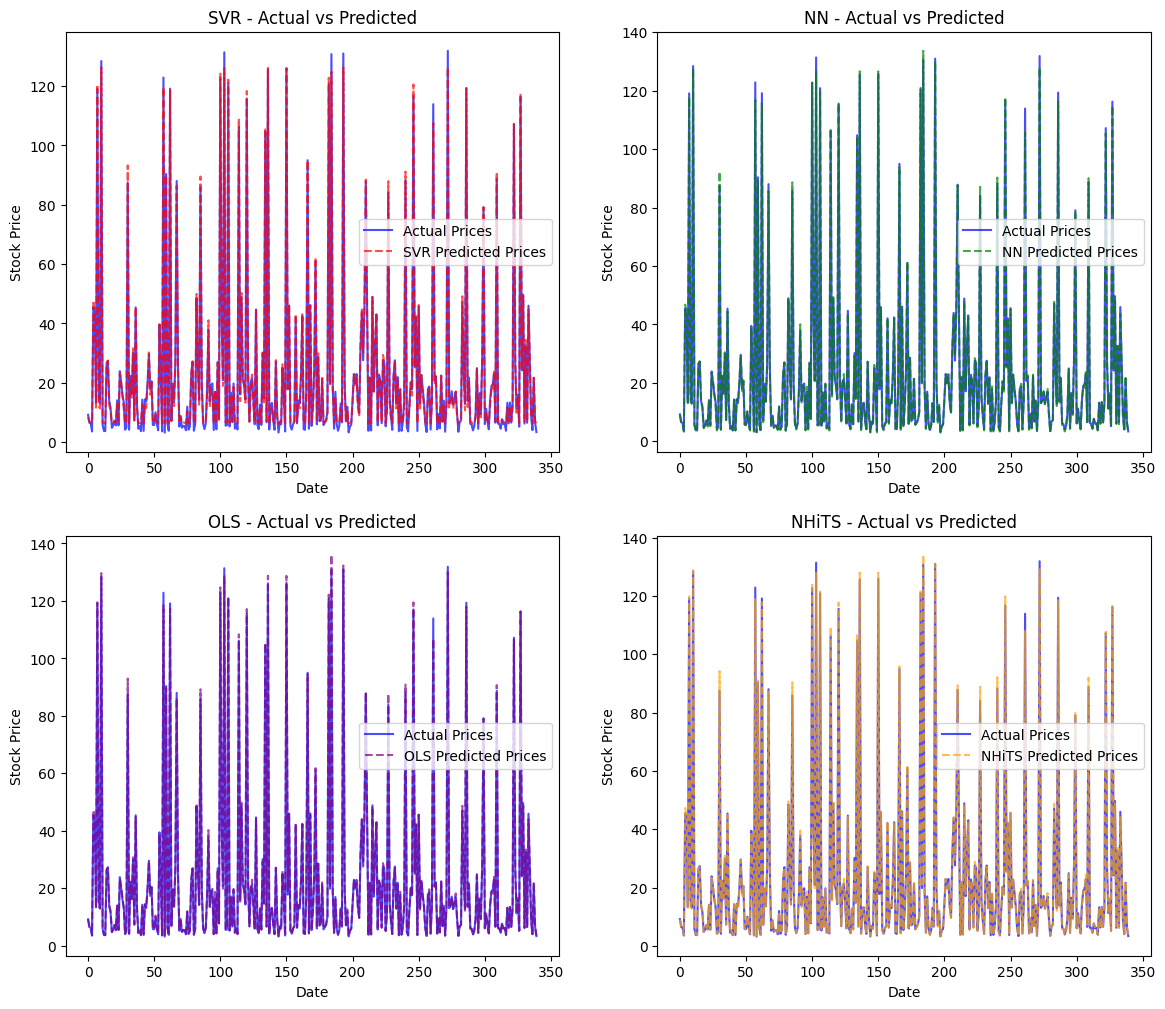

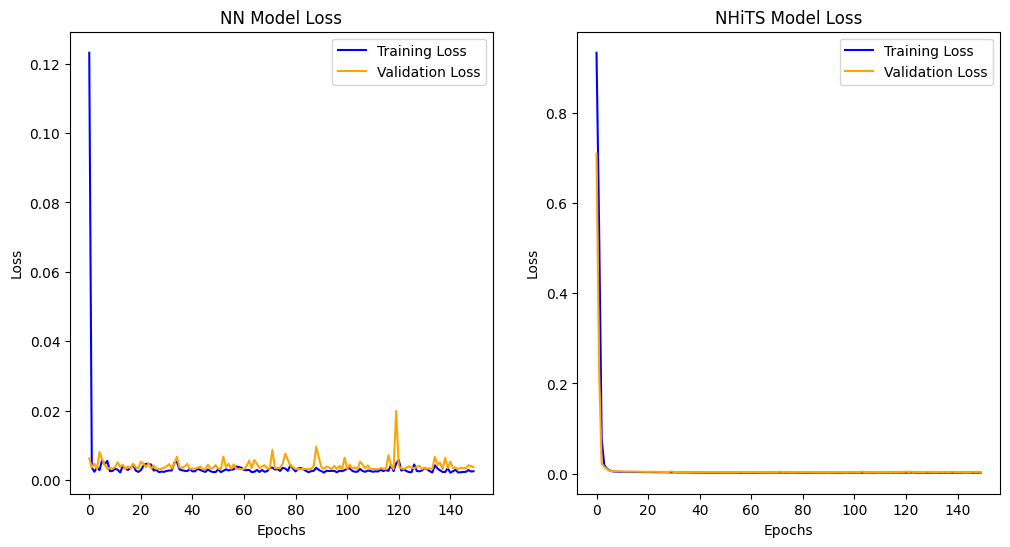

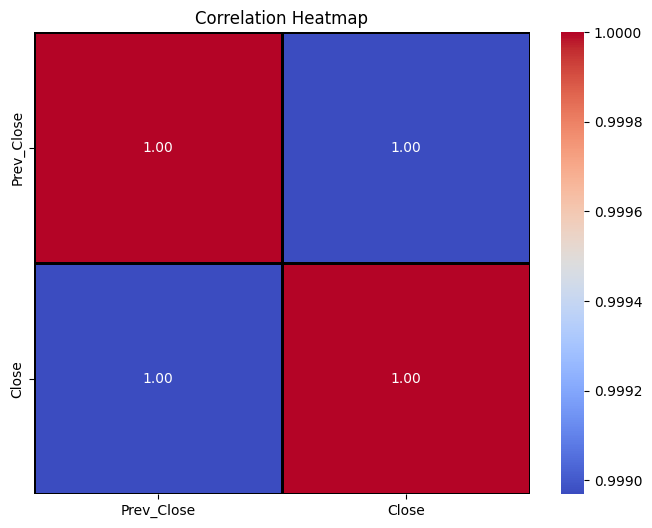

SVR MSE: 2.7838945731037783
NN MSE: 1.0005352967316399
OLS MSE: 0.9301093949301306
NHiTS MSE: 1.0095749717920806


In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
import tensorflow as tf
from tensorflow.keras import layers, models
import statsmodels.api as sm

# Ensure TensorFlow uses GPU memory growth settings if GPU is available
physical_devices = tf.config.list_physical_devices('GPU')
if physical_devices:
    print("GPU is available")
    # Set memory growth to avoid allocating all GPU memory
    try:
        for device in physical_devices:
            tf.config.experimental.set_memory_growth(device, True)
    except RuntimeError as e:
        print(f"Error while setting memory growth: {e}")
else:
    print("GPU is not available, using CPU")

# Load and preprocess the data
def load_and_preprocess_data(file_path):
    # Load the data
    data = pd.read_csv(file_path)

    # Print column names to identify the issue
    print("Columns in the dataset:", data.columns)

    # Check for a 'Close' or equivalent column
    if 'Close' not in data.columns and 'Adj Close' not in data.columns:
        raise ValueError("The dataset does not contain a valid closing price column.")
    
    # If the 'Close' column exists, use it; otherwise, use 'Adj Close'
    if 'Close' in data.columns:
        closing_price_column = 'Close'
    else:
        closing_price_column = 'Adj Close'

    # Feature engineering (using previous day's close price for prediction)
    data['Prev_Close'] = data[closing_price_column].shift(1)
    data.dropna(inplace=True)  # Drop NaN values generated by the shift

    # Ensure we only use numeric data for scaling
    data = data[['Prev_Close', closing_price_column]]  # Use the correct column for closing price

    # Scaling features
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(data)

    X = scaled_data[:, 0].reshape(-1, 1)  # Using 'Prev_Close' as feature
    y = scaled_data[:, 1]  # The closing price as target

    return X, y, scaler, data

# SVR Model
def svr_model(X_train, X_test, y_train, y_test, scaler):
    svr_regressor = SVR(kernel='rbf')
    svr_regressor.fit(X_train, y_train)
    
    # Predicting
    y_pred = svr_regressor.predict(X_test)
    
    # Rescale the predictions and actual values back to original scale
    y_test_rescaled = scaler.inverse_transform(np.concatenate([X_test, y_test.reshape(-1, 1)], axis=1))[:, 1]
    y_pred_rescaled = scaler.inverse_transform(np.concatenate([X_test, y_pred.reshape(-1, 1)], axis=1))[:, 1]

    return y_test_rescaled, y_pred_rescaled

# Neural Network Model (Optimized with loss tracking)
def nn_model(X_train, X_test, y_train, y_test, scaler):
    model = models.Sequential()
    model.add(layers.Dense(250, input_dim=1, activation='relu'))  # 250 neurons in the first layer
    model.add(layers.Dense(250, activation='relu'))  # 250 neurons in the second layer
    model.add(layers.Dense(250, activation='relu'))  # 250 neurons in the third layer
    model.add(layers.Dense(1))  # Output layer

    model.compile(optimizer='adam', loss='mean_squared_error')

    # Train the model (150 epochs)
    history = model.fit(X_train, y_train, epochs=150, batch_size=32, validation_split=0.2, verbose=0)

    # Predicting
    y_pred = model.predict(X_test)

    # Rescale the predictions and actual values back to original scale
    y_test_rescaled = scaler.inverse_transform(np.concatenate([X_test, y_test.reshape(-1, 1)], axis=1))[:, 1]
    y_pred_rescaled = scaler.inverse_transform(np.concatenate([X_test, y_pred.reshape(-1, 1)], axis=1))[:, 1]

    return y_test_rescaled, y_pred_rescaled, history

# Statsmodels for OLS Regression
def ols_regression(X_train, X_test, y_train, y_test, scaler):
    X_train = sm.add_constant(X_train)  # Add intercept
    X_test = sm.add_constant(X_test)  # Add intercept
    
    model = sm.OLS(y_train, X_train)
    results = model.fit()

    # Predicting
    y_pred = results.predict(X_test)

    # Rescale the predictions and actual values back to original scale
    y_test_rescaled = scaler.inverse_transform(np.concatenate([X_test[:, 1:].reshape(-1, 1), y_test.reshape(-1, 1)], axis=1))[:, 1]
    y_pred_rescaled = scaler.inverse_transform(np.concatenate([X_test[:, 1:].reshape(-1, 1), y_pred.reshape(-1, 1)], axis=1))[:, 1]

    return y_test_rescaled, y_pred_rescaled

# NHiTSModel Model (Basic Time Series Model)
def nhits_model(X_train, X_test, y_train, y_test, scaler):
    # Define the model architecture (simplified version for this example)
    model = models.Sequential()
    model.add(layers.LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1)))  # LSTM layer
    model.add(layers.LSTM(50))  # Second LSTM layer
    model.add(layers.Dense(1))  # Output layer

    model.compile(optimizer='adam', loss='mean_squared_error')

    # Train the model (150 epochs)
    history = model.fit(X_train, y_train, epochs=150, batch_size=32, validation_split=0.2, verbose=0)

    # Predicting
    y_pred = model.predict(X_test)

    # Rescale the predictions and actual values back to original scale
    y_test_rescaled = scaler.inverse_transform(np.concatenate([X_test, y_test.reshape(-1, 1)], axis=1))[:, 1]
    y_pred_rescaled = scaler.inverse_transform(np.concatenate([X_test, y_pred.reshape(-1, 1)], axis=1))[:, 1]

    return y_test_rescaled, y_pred_rescaled, history

# Real-time Prediction with Model and Plotting
def real_time_prediction(file_path):
    # Load and preprocess the data
    X, y, scaler, data = load_and_preprocess_data(file_path)

    # Split the data into train and test sets (80% train, 20% test)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # SVR Model
    svr_y_test, svr_y_pred = svr_model(X_train, X_test, y_train, y_test, scaler)

    # Neural Network Model
    nn_y_test, nn_y_pred, nn_history = nn_model(X_train, X_test, y_train, y_test, scaler)

    # OLS Regression Model (Statsmodels)
    ols_y_test, ols_y_pred = ols_regression(X_train, X_test, y_train, y_test, scaler)

    # NHiTS Model
    nhits_y_test, nhits_y_pred, nhits_history = nhits_model(X_train, X_test, y_train, y_test, scaler)

    # Plot the results
    plt.figure(figsize=(14, 12))

    # Plotting model predictions
    models = [
        ('SVR', svr_y_test, svr_y_pred, 'red'),
        ('NN', nn_y_test, nn_y_pred, 'green'),
        ('OLS', ols_y_test, ols_y_pred, 'purple'),
        ('NHiTS', nhits_y_test, nhits_y_pred, 'orange')
    ]
    
    # Plotting each model's prediction
    for i, (label, y_test_rescaled, y_pred_rescaled, color) in enumerate(models, 1):
        plt.subplot(2, 2, i)
        plt.plot(y_test_rescaled, label="Actual Prices", color='blue', alpha=0.7)
        plt.plot(y_pred_rescaled, label=f"{label} Predicted Prices", color=color, linestyle='--', alpha=0.7)
        plt.title(f'{label} - Actual vs Predicted')
        plt.xlabel('Date')
        plt.ylabel('Stock Price')
        plt.legend()

    # Plotting training and validation loss for NN and NHiTS models
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.plot(nn_history.history['loss'], label='Training Loss', color='blue')
    plt.plot(nn_history.history['val_loss'], label='Validation Loss', color='orange')
    plt.title('NN Model Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(nhits_history.history['loss'], label='Training Loss', color='blue')
    plt.plot(nhits_history.history['val_loss'], label='Validation Loss', color='orange')
    plt.title('NHiTS Model Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    # Correlation Heatmap
    plt.figure(figsize=(8, 6))
    correlation_matrix = data[['Prev_Close', 'Close']].corr()
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=1, linecolor='black')
    plt.title('Correlation Heatmap')
    plt.show()

    # Print some metrics for comparison
    print(f"SVR MSE: {mean_squared_error(svr_y_test, svr_y_pred)}")
    print(f"NN MSE: {mean_squared_error(nn_y_test, nn_y_pred)}")
    print(f"OLS MSE: {mean_squared_error(ols_y_test, ols_y_pred)}")
    print(f"NHiTS MSE: {mean_squared_error(nhits_y_test, nhits_y_pred)}")

# Example usage
file_path = '/kaggle/input/nvidia-stock-data/NVIDIA_STOCK.csv'  # Update with your CSV file path
real_time_prediction(file_path)
